## Exercise 4

### Part 1

In [328]:
import numpy as np
import math

import matplotlib.pyplot as plt

In [329]:
def MOMquickselect(array, k):
  if k > 0 and k <= len(array):
    pivot = MOM(array)
    low, equal, high = partition(array, pivot)

    if k <= len(low):
      return MOMquickselect(low, k)
    
    elif k <= len(low) + len(equal):
      return pivot
    
    else:
      return MOMquickselect(high, k - len(low) - len(equal))

def MOM(values):
    if len(values) <= 5:
      return sorted(values)[len(values) // 2]

    parted = [values[i:i+5] for i in range(0, len(values), 5)]
    medians = [sorted(sublist)[len(sublist) // 2] for sublist in parted]

    return MOM(medians)

def partition(arr, pivot):
  low, high, equal = [],[],[]

  for item in arr:
    if item < pivot:
      low.append(item)
    elif item > pivot:
      high.append(item)
    else:
      equal.append(item)
  
  return low, equal, high

In [330]:
def knn_regression(X, y, xtest, k):

    n = X.shape[0]
    d = X.shape[1]

    distances = np.linalg.norm(X-xtest, axis=1)

    kth_point = MOMquickselect(distances, k)

    aggregate = 0
    count = 0

    for n,i in enumerate(distances):
      if (i < kth_point):
        aggregate += y[n]
        count+=1

    for n,i in enumerate(distances):
      if(count == k):
        break
      
      if(i==kth_point):
        aggregate += y[n]
        count+=1
    
    return (aggregate/k)


def knn(X, y, test, k):
    knn = lambda t : knn_regression(X, y, t, k)
    return np.apply_along_axis(knn, 1, test).flatten()

In [331]:
## Quick test
X = np.array([[1,2],[3,4], [1,1]])
y = np.array([0,1,10])

x_test = np.array([0,0])
knn_regression(X,y,x_test,2)

5.0

### Part 2

In [332]:
# Dataset D
X_D = np.loadtxt('a1-files/X_train_D.csv', delimiter=',').reshape(-1,1)
X_test_D = np.loadtxt('a1-files/X_test_D.csv', delimiter=',').reshape(-1,1)

## Append 1s
X_D = np.hstack((X_D, np.ones((X_D.shape[0],1))))
X_test_D = np.hstack((X_test_D, np.ones((X_test_D.shape[0],1))))

y_D = np.loadtxt('a1-files/Y_train_D.csv', delimiter=',').reshape(-1,1)
y_test_D = np.loadtxt('a1-files/Y_test_D.csv', delimiter=',')


# Dataset E
X_E = np.loadtxt('a1-files/X_train_E.csv', delimiter=',').reshape(-1,1)
X_test_E = np.loadtxt('a1-files/X_test_E.csv', delimiter=',').reshape(-1,1)

## Append 1s
X_E = np.hstack((X_E, np.ones((X_E.shape[0],1))))
X_test_E = np.hstack((X_test_E, np.ones((X_test_E.shape[0],1))))

y_E = np.loadtxt('a1-files/Y_train_E.csv', delimiter=',').reshape(-1,1)
y_test_E = np.loadtxt('a1-files/Y_test_E.csv', delimiter=',').reshape(-1,1)

In [333]:
def lin_regression(X,y):
    return np.linalg.solve(X.T @ X, X.T @ y)

In [334]:
def plot_predictions(X,y, test, dataset):
    plt.figure(figsize=(10,8))

    xs = np.linspace(np.min(test), np.max(test), 1000)
    xs  = xs.reshape(-1,1)
    xs = np.hstack((xs, np.ones((xs.shape[0],1))))

    # Linear
    params = lin_regression(X, y).flatten()
    y_lin = xs @ params

    plt.plot(xs[:,0].flatten(), y_lin, label="linear")

    # KNN
    
    # 1 Nearest Neighbor
    y_knn_1 = knn(X, y, xs, 1)
    plt.plot(xs[:,0].flatten(), y_knn_1, label="KNN-1")

    # 9 nearest neighbor
    y_knn_9 = knn(X, y, xs, 9)
    plt.plot(xs[:,0], y_knn_9, label="KNN-9")

    plt.xlabel('Data')
    plt.ylabel('Prediction')
    plt.title(f'Dataset {dataset} - Predicted values')
    plt.legend()
    plt.show()


def plot_mse(X, y, test, y_test, dataset):
    params = lin_regression(X, y).flatten()
    y_pred = test @ params
    least_squares_mse = (np.linalg.norm(y_test.flatten() - y_pred)**2)/y_pred.shape[0]

    mseknn = []

    for k in range (1,10):
        y_pred = knn(X, y, test, k)
        mse = (np.linalg.norm(y_test.flatten() - y_pred)**2)/y_pred.shape[0]
        mseknn.append(mse)

    plt.figure(figsize=(10,8))

    plt.plot(range(1,10), mseknn, label='KNN')
    plt.hlines(least_squares_mse, 1,9, linestyles='dashed', color='orange', label='Least Squares')

    plt.xlabel('K value')
    plt.ylabel('Mean Squared Error')
    plt.title(f'Dataset {dataset} - Mean Squared Error against K-value for KNN')

    plt.legend()

    plt.show()

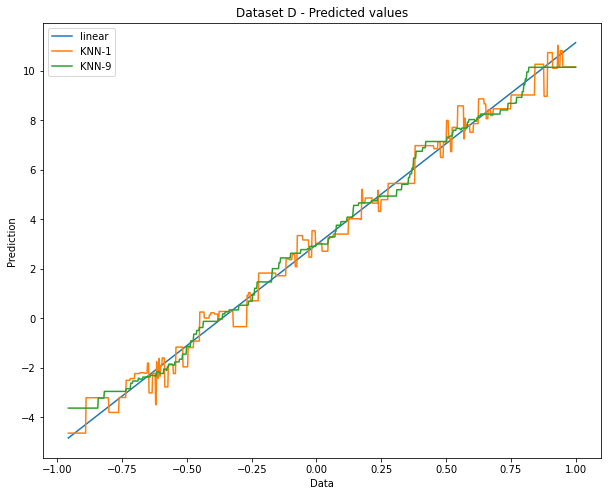

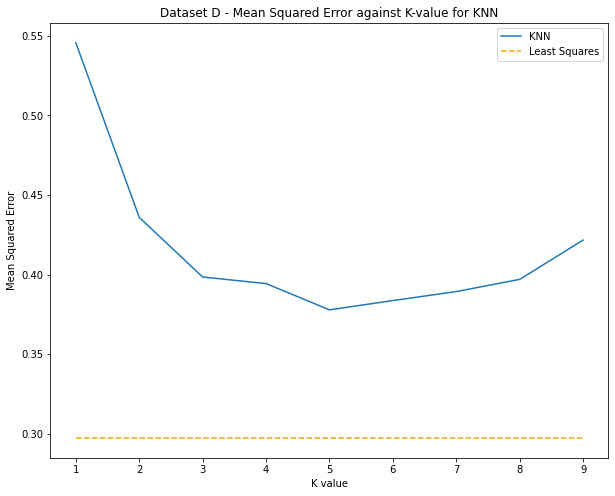

In [336]:
plot_predictions(X_D, y_D, X_test_D, 'D')
plot_mse(X_D, y_D, X_test_D, y_test_D, 'D')

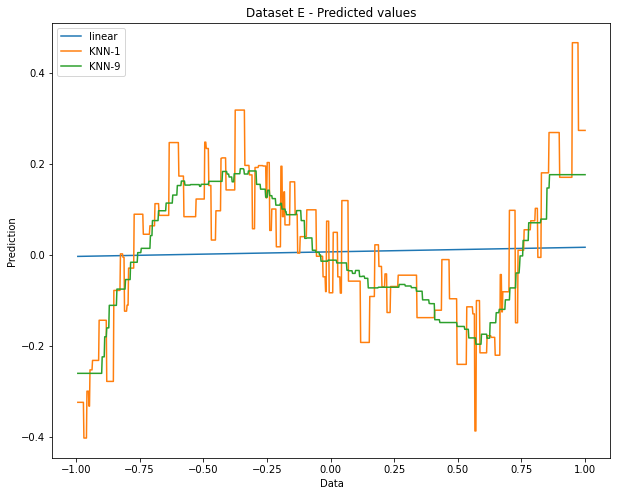

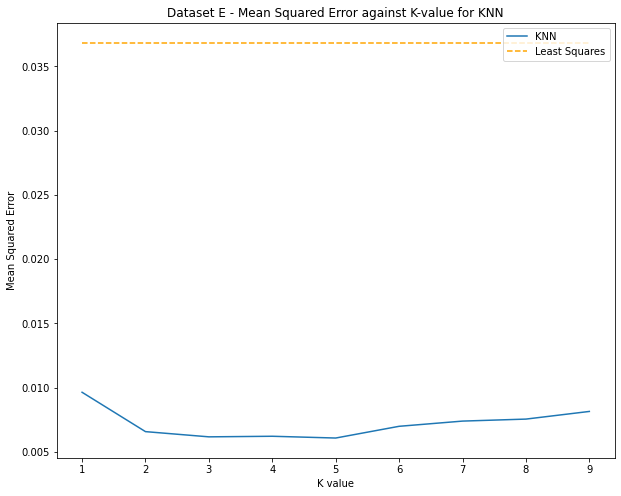

In [337]:
plot_predictions(X_E, y_E, X_test_E, 'E')
plot_mse(X_E, y_E, X_test_E, y_test_E, 'E')

### Discussion

Linear Regression (Unregularized) works much better on the the first dataset (D) as compared to KNN with any number of neighbours. This is because the data is following a linear trend and generally linear regression would create a better fit for the data than KNN would. This can clearly be seen in the plot for the Mean Squared Loss as the Least Squares solution has a significantly lower loss than any of the the KNN solutions.

KNN however performs much better on the other dataset (E) than linear regression. This is most likely due to the fact that this data no longer follows a linear trend and so KNN can provide a much better fit for this kind of data. This can also be easily seen in the plot as KNN with any value for $k$ performs significantly better than the linear regression as it has a lower MSE.

### Part 3

In [338]:
# Dataset E
X = np.loadtxt('a1-files/X_train_F.csv', delimiter=',')
X_test = np.loadtxt('a1-files/X_test_F.csv', delimiter=',')

## Append 1s
X = np.hstack((X, np.ones((X.shape[0],1))))
X_test = np.hstack((X_test, np.ones((X_test.shape[0],1))))

y = np.loadtxt('a1-files/Y_train_F.csv', delimiter=',').reshape(-1,1)
y_test = np.loadtxt('a1-files/Y_test_F.csv', delimiter=',').reshape(-1,1)

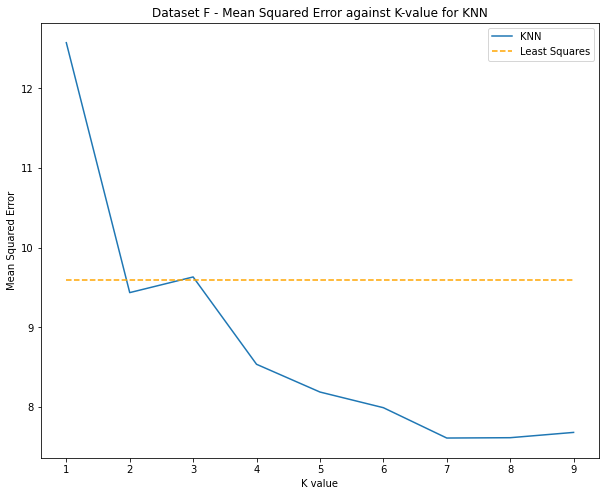

In [339]:
plot_mse(X,y,X_test, y_test, 'F')

### Discussion

KNN works better for this dataset with a high enough value for k. This can be explained by the y-values that we aggregate for each value of k, since the values lie over a rather large range (and noisier), a few neighbors (k=1,2,3) is not enough to make a reasonably good prediction. This could be also a consequence of non-linear data trends as discussed before. More neighbors allow to extrapolate more meaningful information which is why increasing the value of k gives us a much smaller loss value.  